## MIE1613:Stochastic Simulation - HomeWork 1

__Name: Hariskrishna Thiruvenkadasamy Venkatesan
<br>
Student No: 1004217901
<br>
Dept: Mechanical & Industrial Engineering
<br>
Prog: MEng__



__Problem 1__

__1a) Exact Expected Value of the Function (X-3)__

In [134]:
import scipy.integrate as integrate
Value, Erroe = integrate.quad(lambda x: (x-3)*0.2*np.exp(-0.2*x), 3, float('inf') )
print('The Actual Value of Integral is:',Value)


The Actual Value of Integral is: 2.7440581804700983


__1b) Expected Value estimate using Monte Carlo simulation with 95% CI__ 

In [140]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

# Creation of Empty lists
Exp =[]       # list to stores the expected values 
Iter = []     # list to store the present iteration i 
SampleAvg =[] # list to save all the sample Avg(for the plot)
N = 4000      # No of iteration 

for i in range(N):
    X = np.random.exponential(1/0.2)
    if X-3>0:
        Exp.append(X-3)
    else:
        Exp.append(0)
    
    Iter.append(i)  
    SampleAvg.append(np.mean(Exp))

# Calculation of CI 
import statistics
mean = np.mean(Exp)
stdv = (statistics.stdev(Exp))
h = 1.96*(stdv/np.sqrt(N))
print('The Actual Value of Integral is:',Value,'\n')          
print('The Estimated Expected value of the Function is:',mean,'\n')
print('The Standard deviation is:',stdv,'\n')
print('The UCI is:',np.mean(Exp)+h,'\n')
print('The LCI is:',np.mean(Exp)-h)   

The Actual Value of Integral is: 2.7440581804700983 

The Estimated Expected value of the Function is: 2.7220762910877925 

The Standard deviation is: 4.327271181799975 

The UCI is: 2.856179814367218 

The LCI is: 2.587972767808367


__1c) Plot demonstrating the Convergence of Monte Carlo estimate__

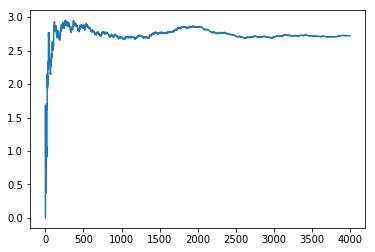

In [141]:
plt.plot(Iter,SampleAvg)
plt.show()

__Problem 2(a) (T=1000)__

__Logic Used:__ <br>
When the states becomes zero, <br>
The event "NextFailure" is set to infinity, The present value of NextRepair is transferred to a Temp Variable (Which is the next immediate repair/NextEvent) and "NextRepair" is updated as "NextRepair" + 2.5 (As only one component can be repaired at a time, Also, TempVariable < NextRepair) <br> Now the clock is updated by "TempVariable" and "TempVariable" is set to infinity

In [125]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)

clock = 0
S=2
T = 0
States =[2]
EventTimes =[0]

NextFailure = np.ceil(6*np.random.random())
NextRepair = float('inf')
TempVar = float('inf')

while T<1000:
    x=T         #Variable to record the value of clock before the loop begins
    
    '''Loop for Clock, Min of the three variables(NextRepair, NextFailure and TempVariable) 
    is updated and clock and set as NextEvent'''
    
    if NextFailure<=NextRepair and NextFailure<=TempVar:
        result = 'Failure'
        clock = NextFailure       
    elif NextRepair<=NextFailure and NextRepair<=TempVar:
        result = 'Repair1'
        clock = NextRepair       
    elif TempVar<=NextRepair and TempVar<=NextFailure:
        result ='Repair2'
        clock = TempVar
        
    #Loop if result = failure
    if result == 'Failure':
        S=S-1
        if S == 1:
            NextFailure = clock + np.ceil(6*np.random.random())
            NextRepair = clock + 2.5
        '''when state is 0, two components has to be repaired, since only one 
        component can be repaired at a time, the existing value of NextRepair 
        is transferred to a TemPvariable and NextRepair is updated as NextRepair + 2.5'''
        if S == 0: 
            NextFailure = float('inf')
            TempVar = NextRepair
            NextRepair = NextRepair + 2.5
    
    # Loop if Repair(for S = 1)
    if result == 'Repair1':
        S = S+1
        NextRepair = float('inf')
    # Loop if Repair(for S = 0 )
    if result == 'Repair2':
        S = S+1
        NextFailure = clock + np.ceil(6*np.random.random())
        TempVar = float('inf')
    if NextFailure == NextRepair: 
        print('yes1')
    if NextFailure == TempVar:
        print('yes2')
    if TempVar == NextRepair and TempVar != float('inf'):
        print('yes3')
    States.append(S)
    EventTimes.append(clock)
    T = clock

print("Simulation Ends at:",x)
print('Estimated Average No of Functional Components is:', np.mean(States))

Simulation Ends at: 998.5
Estimated Average No of Functional Components is: 1.1539961013645224


__Problem 2(b) (T=2000)__

In [126]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)

clock = 0
S=2
T = 0
States =[2]

EventTimes =[0]
NextFailure = np.ceil(6*np.random.random())
NextRepair = float('inf')
TempVar = float('inf')

while T<2000:
    x=T
    # Loop for Clock
    if NextFailure<NextRepair and NextFailure<TempVar:
        result = 'Failure'
        clock = NextFailure    
    if NextRepair<NextFailure and NextRepair<TempVar:
        result = 'Repair1'
        clock = NextRepair
    if TempVar<NextRepair and TempVar<NextFailure:
        result ='Repair2'
        clock = TempVar
        

        # Loop if failure
    if result == 'Failure':
        S=S-1
        if S == 1:
            NextFailure = clock + np.ceil(6*np.random.random())
            NextRepair = clock + 2.5
        if S == 0:
            NextFailure = float('inf')
            TempVar = NextRepair
            NextRepair = NextRepair + 2.5

    # Loop if Repair(for S = 1)
    if result == 'Repair1':
        S = S+1
        NextRepair = float('inf')

        # Loop if Repair(for S = 0 )
    if result == 'Repair2':
        S = S+1
        NextFailure = clock + np.ceil(6*np.random.random())
        TempVar = float('inf')
    States.append(S)
    EventTimes.append(clock)
    T = clock

print("Simulation Ends at:",x)
print('Estimated Average No of Functional Components is:', np.mean(States))
#plt.plot(EventTimes, States, drawstyle = 'steps-post')

Simulation Ends at: 1999.5
Estimated Average No of Functional Components is: 1.1648884578079535


for T = 1000, the Avg functional component is 1.15 and for T = 2000,the Avg functional component is 1.16<br>
The the Time period increases the Average # of functional component converges to 1.16


__Problem3__

In [127]:
import numpy as np 
import matplotlib.pyplot as plt 

# Timer Function to update the clock and determine the NextEvent
def Timer():
    global clock
    global NextRepair
    global NextFailure
    global TempVar
    
    if min(NextFailure,NextRepair,TempVar) == NextFailure:
        result = 'Failure'
        clock = NextFailure
    elif min(NextFailure,NextRepair,TempVar) == NextRepair:
        result = 'Rep1'
        clock = NextRepair   
    elif min(NextFailure,NextRepair,TempVar) == TempVar:
        result ='Rep2'
        clock = TempVar
    return result

np.random.seed(1)
TTF =[]

for i in range(1000):  #1000 Replications
    
    clock = 0
    S = 3
    
    NextFailure = np.ceil(6*np.random.random())
    NextRepair = float('inf')
    TempVar = float('inf')
    
    while S>0:
        NextEvent = Timer() #Calling the timer funcation to update the EventCalender
        
        '''
        When the Next event is Failure, there can be two scenarios( S = 1 or S = 2),
        When S = 2 means only one component is under repair, Hence the NextFailure 
        and NextRepair will be updated as usual. When S = 1, there is two components
        under repair( only one can be repaired at a time), So, the present value in
        NextRepair is transferred to a TempVariable(similar to Prob2) and NextRepair
        is updated as NextRepair + 3.5
        '''
        if NextEvent == 'Failure':
            S=S-1
            if S == 2:
                NextFailure = clock + np.ceil(6*np.random.random())
                NextRepair = clock + 3.5
            elif S == 1:
                NextFailure = clock + np.ceil(6*np.random.random())
                TempVar = NextRepair
                NextRepair = NextRepair +3.5
        
        elif NextEvent == 'Rep1':
            S = S+1
            NextRepair = float('inf')
        
        elif NextEvent == 'Rep2':
            S = S+1
            TempVar = float('inf')
    TTF.append(clock)
# Calulation of CI 
import statistics
mean = np.mean(TTF)
stdv = (statistics.stdev(TTF))
h = 1.96*(stdv/np.sqrt(1000-1))
          
print('The Estimated Expected value of the Function is:',mean,'\n')
print('The Standard deviation is:',stdv,'\n')
print('The UCI is:',np.mean(TTF)+h,'\n')
print('The LCI is:',np.mean(TTF)-h)           



The Estimated Expected value of the Function is: 35.312 

The Standard deviation is: 30.04758748241718 

The UCI is: 37.17530065025125 

The LCI is: 33.44869934974874
